# Bitcoin Price Prediction Project
## Muhammad Faisal Kamran 2023-BS-AI-025

## About Dataset
The dataset contains historical Bitcoin price data from September 17, 2014 to February 19, 2022 (2,713 daily observations) with the following features:
- Date: The date of the observation (YYYY-MM-DD format)
- Open: Opening price of Bitcoin on that day
- High: Highest price of Bitcoin during that day
- Low: Lowest price of Bitcoin during that day
- Close: Closing price of Bitcoin on that day
- Adj Close: Adjusted closing price (accounts for corporate actions)
- Volume: Trading volume of Bitcoin for that day


## Introduction to Python and Libraries for Machine Learning, Environmental Setup

### Importing Libraries

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
import warnings
warnings.filterwarnings("ignore")

## Reading Dataset

In [34]:
df = pd.read_csv("bitcoin.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2708,2022-02-15,42586.464844,44667.218750,42491.035156,44575.203125,44575.203125,22721659051
2709,2022-02-16,44578.277344,44578.277344,43456.691406,43961.859375,43961.859375,19792547657
2710,2022-02-17,43937.070313,44132.972656,40249.371094,40538.011719,40538.011719,26246662813
2711,2022-02-18,40552.132813,40929.152344,39637.617188,40030.976563,40030.976563,23310007704


## Exploring Dataset

In [35]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [36]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2708,2022-02-15,42586.464844,44667.218750,42491.035156,44575.203125,44575.203125,22721659051
2709,2022-02-16,44578.277344,44578.277344,43456.691406,43961.859375,43961.859375,19792547657
2710,2022-02-17,43937.070313,44132.972656,40249.371094,40538.011719,40538.011719,26246662813
2711,2022-02-18,40552.132813,40929.152344,39637.617188,40030.976563,40030.976563,23310007704
2712,2022-02-19,40022.132813,40246.027344,40010.867188,40126.429688,40126.429688,22263900160


In [37]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2.713000e+03
mean,11311.041069,11614.292482,10975.555057,11323.914637,11323.914637,1.470462e+10
std,16106.428891,16537.390649,15608.572560,16110.365010,16110.365010,2.001627e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,606.396973,609.260986,604.109985,606.718994,606.718994,7.991080e+07
50%,6301.569824,6434.617676,6214.220215,6317.609863,6317.609863,5.098183e+09
75%,10452.399414,10762.644531,10202.387695,10462.259766,10462.259766,2.456992e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [38]:
df.sample()

,Date,Open,High,Low,Close,Adj Close,Volume
742,2016-09-28,606.242981,606.590027,604.606995,604.728027,604.728027,48722600


## Handling missing values, data normalization, standardization, Data visualization using Matplotlib and Seaborn

### Handling Missing Values

In [39]:
df.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2708,False,False,False,False,False,False,False
2709,False,False,False,False,False,False,False
2710,False,False,False,False,False,False,False
2711,False,False,False,False,False,False,False


In [40]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [41]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].replace(['', 'NA', 'NaN'], np.nan)
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].replace(['', 'NA', 'NaN'], np.nan, inplace=True)
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col].fillna(df[col].mean(), inplace=True)

### Data Normalization and standardization

In [42]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

numerical_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

min_max_scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numerical_cols] = min_max_scaler.fit_transform(df[numerical_cols])

print("Normalized Data:")
print(df_normalized.head())

standard_scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[numerical_cols] = standard_scaler.fit_transform(df[numerical_cols])

print("\nStandardized Data:")
print(df_standardized.head())

Normalized Data:
         Date      Open      High       Low     Close  Adj Close    Volume
0  2014-09-17  0.004289  0.003739  0.004243  0.004144   0.004144  0.000043
1  2014-09-18  0.004155  0.003574  0.003649  0.003655   0.003655  0.000081
2  2014-09-19  0.003669  0.003151  0.003217  0.003216   0.003216  0.000091
3  2014-09-20  0.003232  0.003085  0.003298  0.003425   0.003425  0.000088
4  2014-09-21  0.003431  0.002927  0.003348  0.003275   0.003275  0.000059

Standardized Data:
         Date      Open      High       Low     Close  Adj Close    Volume
0  2014-09-17 -0.673469 -0.674119 -0.674314 -0.674633  -0.674633 -0.733717
1  2014-09-18 -0.674028 -0.674804 -0.676833 -0.676675  -0.676675 -0.733046
2  2014-09-19 -0.676062 -0.676559 -0.678664 -0.678516  -0.678516 -0.732874
3  2014-09-20 -0.677890 -0.676833 -0.678321 -0.677640  -0.677640 -0.732927
4  2014-09-21 -0.677057 -0.677491 -0.678110 -0.678266  -0.678266 -0.733441


### Visualization

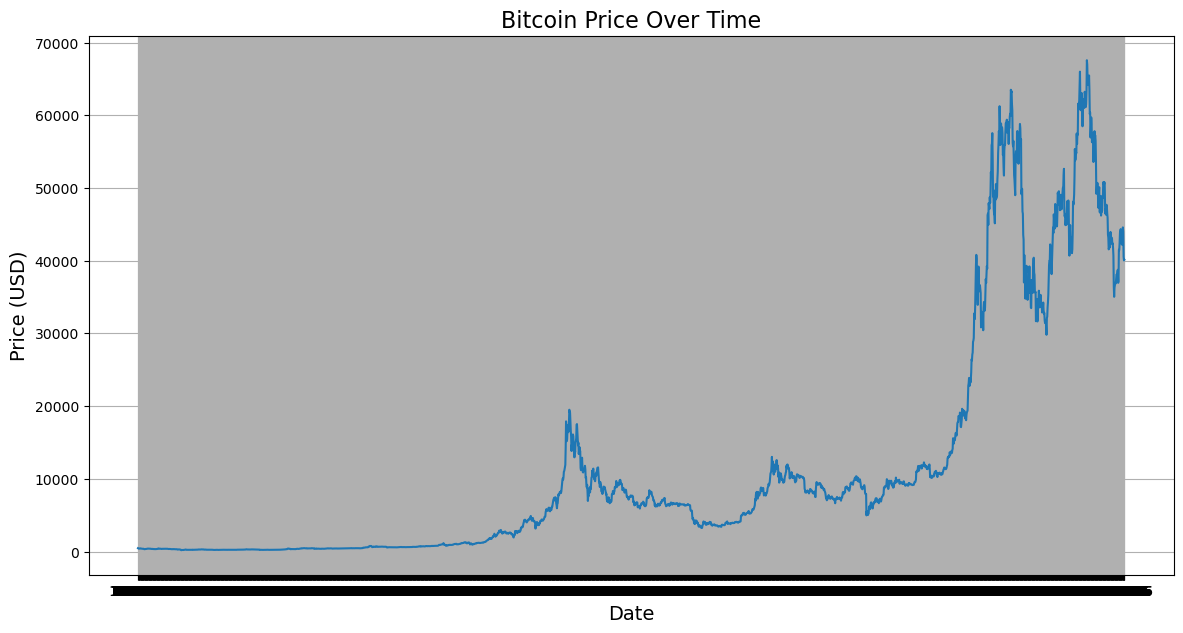

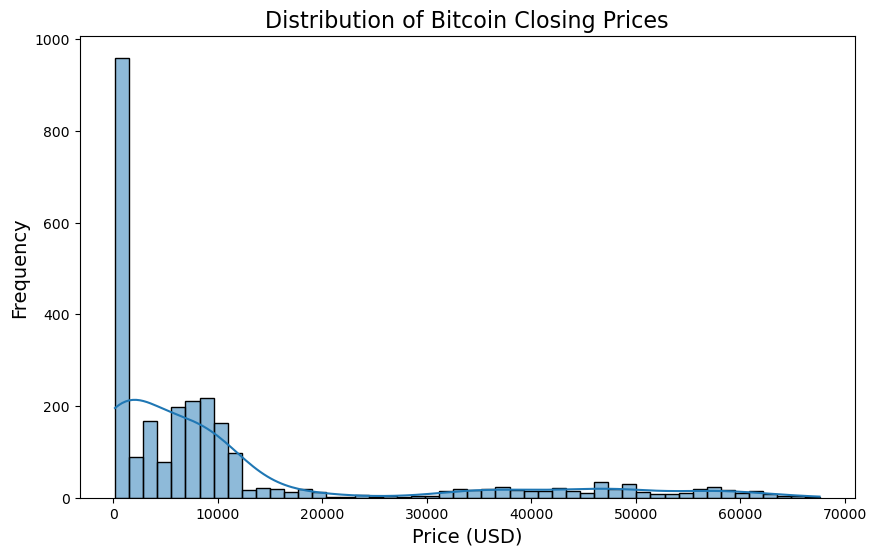

In [43]:
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'])
plt.title('Bitcoin Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.grid(True)
date_format = DateFormatter("%Y-%m")
plt.gca().xaxis.set_major_formatter(date_format)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], kde=True, bins=50)
plt.title('Distribution of Bitcoin Closing Prices', fontsize=16)
plt.xlabel('Price (USD)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

## Data preprocessing

### Outlier Detection and Removal

In [44]:
import pandas as pd
def remove_outliers_iqr(df):
    numeric_cols = df.select_dtypes(include=['number']).columns
    df_clean = df.copy()
    
    for col in numeric_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    
    return df_clean
df_cleaned = remove_outliers_iqr(df)
print("Original shape:", df.shape)
print("Cleaned shape:", df_cleaned.shape)

Original shape: (2713, 7)
Cleaned shape: (2177, 7)


### Convert 'Date' to datetime format and Sort by Date

In [45]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.drop(columns=['Adj Close'], inplace=True)  

### Feature engineering

In [46]:
df['Daily_Return'] = df['Close'].pct_change()
df['MA_7'] = df['Close'].rolling(window=7).mean()
df['MA_30'] = df['Close'].rolling(window=30).mean()
df['Lag_1'] = df['Close'].shift(1)
df['Lag_7'] = df['Close'].shift(7)
df['Lag_30'] = df['Close'].shift(30)

delta = df['Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

df['MA_20'] = df['Close'].rolling(window=20).mean()
df['Upper_Band'] = df['MA_20'] + (2 * df['Close'].rolling(window=20).std())
df['Lower_Band'] = df['MA_20'] - (2 * df['Close'].rolling(window=20).std())

df['Volatility_7'] = df['Daily_Return'].rolling(window=7).std()
df['Volatility_30'] = df['Daily_Return'].rolling(window=30).std()

df_clean = df.dropna()

### Features and Targets

In [47]:
features = [
    'Open', 'High', 'Low', 'Volume', 
    'Daily_Return', 'MA_7', 'MA_30',
    'Lag_1', 'Lag_7', 'Lag_30',
    'RSI', 'Upper_Band', 'Lower_Band',
    'Volatility_7', 'Volatility_30'
]
X = df_clean[features]
y = np.log1p(df_clean['Close']) 

### TIme Series Cross Validation

In [48]:
tscv = TimeSeriesSplit(n_splits=5)
r2_scores = []
rmse_scores = []

for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model = XGBRegressor(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.9,
        colsample_bytree=0.7,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))
    r2 = r2_score(np.expm1(y_test), np.expm1(y_pred))
    
    rmse_scores.append(rmse)
    r2_scores.append(r2)

## Linear Regression

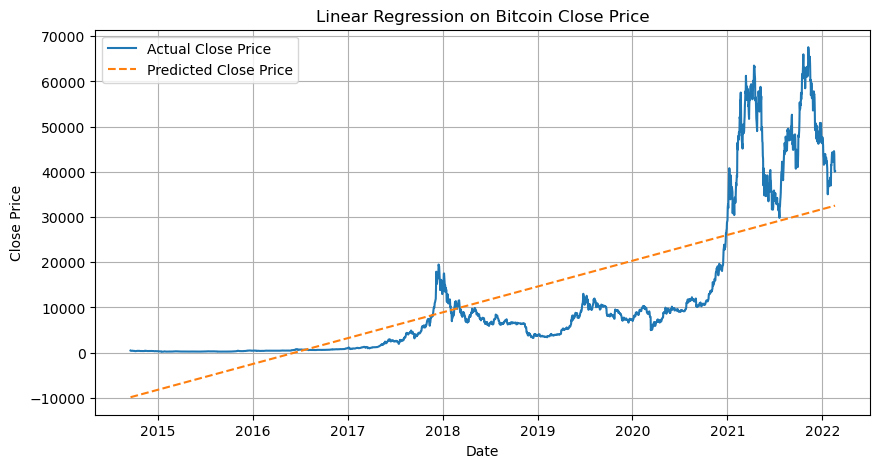

In [49]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])
df['Date_ordinal'] = df['Date'].map(pd.Timestamp.toordinal)

X = df[['Date_ordinal']] 
y = df['Close']         

model = LinearRegression()
model.fit(X, y)

df['Predicted_Close'] = model.predict(X)

plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Close'], label='Actual Close Price')
plt.plot(df['Date'], df['Predicted_Close'], label='Predicted Close Price', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Linear Regression on Bitcoin Close Price')
plt.legend()
plt.grid(True)
plt.show()

## Decision Trees

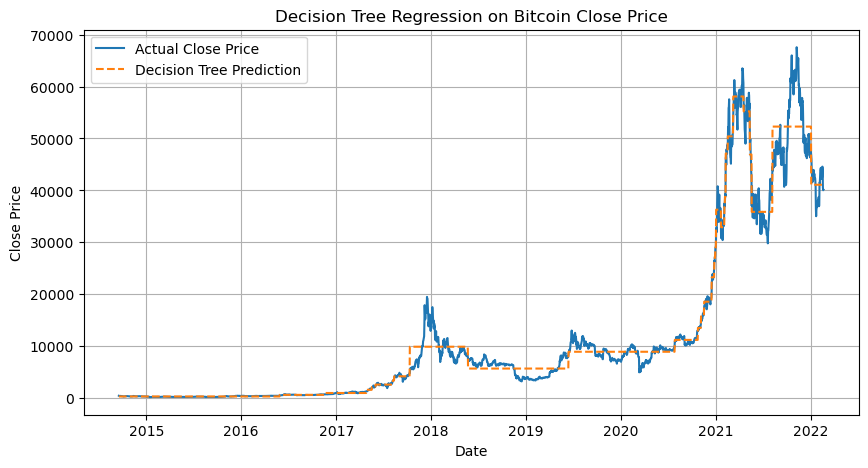

In [50]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt


df['Date'] = pd.to_datetime(df['Date'])
df['Date_ordinal'] = df['Date'].map(pd.Timestamp.toordinal)

X = df[['Date_ordinal']]
y = df['Close']

tree_model = DecisionTreeRegressor(max_depth=5) 
tree_model.fit(X, y)


df['DT_Predicted_Close'] = tree_model.predict(X)

plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Close'], label='Actual Close Price')
plt.plot(df['Date'], df['DT_Predicted_Close'], label='Decision Tree Prediction', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Decision Tree Regression on Bitcoin Close Price')
plt.legend()
plt.grid(True)
plt.show()

## Support Vector Machine

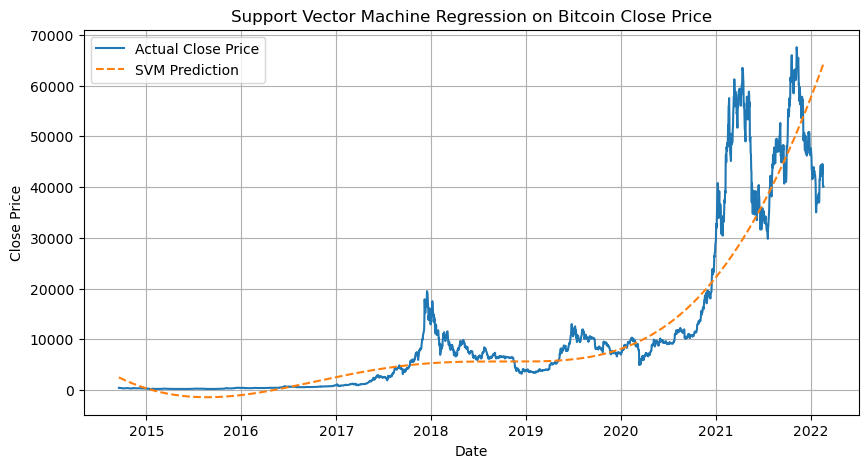

In [51]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])
df['Date_ordinal'] = df['Date'].map(pd.Timestamp.toordinal)

X = df[['Date_ordinal']]
y = df['Close']

scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_scaled, y_scaled)

y_svr_pred_scaled = svr_model.predict(X_scaled)
df['SVR_Predicted_Close'] = scaler_y.inverse_transform(y_svr_pred_scaled.reshape(-1, 1))

plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Close'], label='Actual Close Price')
plt.plot(df['Date'], df['SVR_Predicted_Close'], label='SVM Prediction', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Support Vector Machine Regression on Bitcoin Close Price')
plt.legend()
plt.grid(True)
plt.show()

## Evaluating Metrics

In [52]:
print("\n=== Cross-Validated Performance ===")
print(f"Avg RMSE: {np.mean(rmse_scores):.2f}")
print(f"Avg R²: {np.mean(r2_scores):.4f}")


=== Cross-Validated Performance ===
Avg RMSE: 7259.75
Avg R²: -1.2380


## Model Training

In [53]:
final_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.9,
    colsample_bytree=0.7,
    random_state=42
)
final_model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

## Prediction

In [54]:
latest_input = X.iloc[[-1]]
predicted_price_log = final_model.predict(latest_input)[0]
predicted_price = predicted_price_log

print("\n=== Latest Price Prediction ===")
print(f"Actual Price: ${df_clean.iloc[-1]['Close']:.2f}")
print(f"Predicted Price: ${predicted_price:.2f}")



=== Latest Price Prediction ===
Actual Price: $40126.43
Predicted Price: $42593.43
